# Weather-Related Disease Prediction
(Supporting SDG 3 - Good Health and Well-being)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('weather_disease_dataset.csv')

# Encode categorical features
le_region = LabelEncoder()
le_disease = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])
df['Disease'] = le_disease.fit_transform(df['Disease'])

In [ ]:
# Define features and target
X = df[['Temperature', 'Humidity', 'Rainfall', 'Region']]
y = df['Disease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = model.feature_importances_
features = X.columns

[[1 1 2 4]
 [5 5 7 3]
 [3 3 4 6]
 [5 3 1 7]]
              precision    recall  f1-score   support

           0       0.07      0.12      0.09         8
           1       0.42      0.25      0.31        20
           2       0.29      0.25      0.27        16
           3       0.35      0.44      0.39        16

    accuracy                           0.28        60
   macro avg       0.28      0.27      0.26        60
weighted avg       0.32      0.28      0.29        60



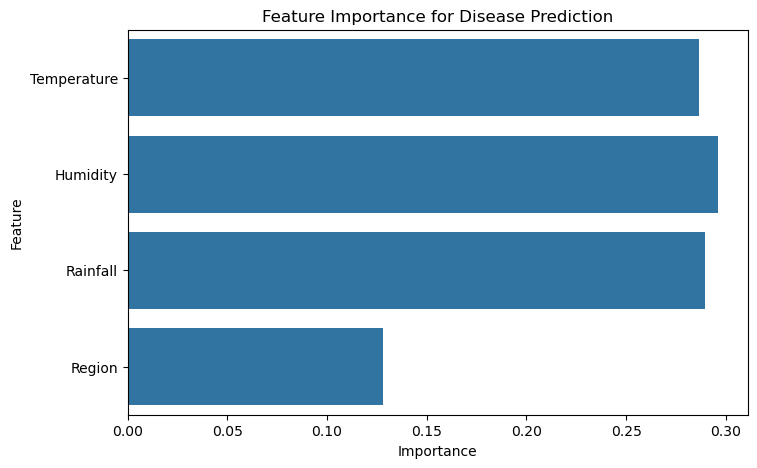

In [ ]:
# Plot feature importance

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance for Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()